### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
df = pd.read_csv('FIFA WC 2022 Players Stats.csv')
df.head()

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
0,Argentina,2,Adidas,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65,46.67%,43%,Adidas
1,Argentina,2,Adidas,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,-,-,-,-,-,-,-,-,Nike
2,Argentina,2,Adidas,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,-,-,-,-,-,-,-,-,Adidas
3,Argentina,2,Adidas,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17,-,-,Nike
4,Argentina,2,Adidas,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97,-,-,Nike


### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

In [22]:
clubs_freq = df['Club '].value_counts(sort=True).head(10)
px.bar(data_frame=clubs_freq,title='Clubs with the largest number of players played at the World Cup')

#### Write your insghts here
- We can see that among the top 10 clubs 8 were from europe
- No club had more than 16 players played at the world cup

In [24]:
apperance_freq = df[' Appearances'].value_counts(sort=True).head(10)
px.bar(data_frame=apperance_freq,title='The most number of appearances at the World Cup')

#### Write your insghts here
- The most number of appearances is 3 and the reason might be that the number of matches in the group stage is 3
- We have players that came with their national team but didn't play any match

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

In [46]:
df1 = df.copy()
df1 = df1.dropna(subset=['Dribbles per 90'])
df1 = df1[(df1['Dribbles per 90'] != '-')&(df1['Dribbles per 90'] != 'N.A')&(df1['Dribbles per 90'] != 'N,A')]
df1['Dribbles per 90'] = pd.to_numeric(df1['Dribbles per 90'])

In [47]:
df1 = df1.dropna(subset=['Goals Scored '])
df1 = df1[(df1['Goals Scored '] != '-')&(df1['Goals Scored '] != 'N.A')&(df1['Goals Scored '] != 'N,A')]
df1['Goals Scored '] = pd.to_numeric(df1['Goals Scored '])

<AxesSubplot: xlabel='Goals Scored ', ylabel='Dribbles per 90'>

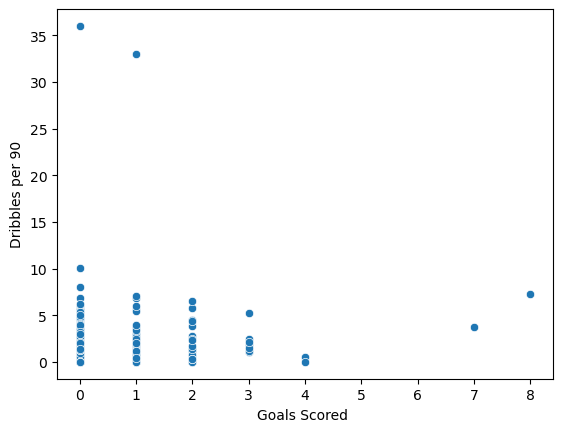

In [48]:
sns.scatterplot(data=df1,x='Goals Scored ', y='Dribbles per 90')

#### Insights
- Goals are scattered around 0 to 2 and Dribbes time is between 0 and 5
- We don't have a clear relation between dribble time and the goals scored

In [56]:
px.histogram(data_frame=df1,x='Nationality ',y='Goals Scored ',)

#### Insights
- Even though France didn't won the world cup but they were the highest goal scorers in the WC
- Portugal came fourth in the scorers list even though they did leave the WC from the quarter-finals

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

In [58]:
df1.columns

Index(['Nationality ', 'FIFA Ranking ', 'National Team Kit Sponsor',
       'Position', 'National Team Jersey Number', 'Player DOB', 'Club ',
       'Player Name ', ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90', 'Interceptions per 90', 'Tackles per 90',
       'Total Duels Won per 90', 'Save Percentage', 'Clean Sheets',
       'Brand Sponsor/Brand Used'],
      dtype='object')

In [59]:
df1 = df1.dropna(subset=['Assists Provided '])
df1 = df1[(df1['Assists Provided '] != '-')&(df1['Assists Provided '] != 'N.A')&(df1['Assists Provided '] != 'N,A')]
df1['Assists Provided '] = pd.to_numeric(df1['Assists Provided '])

In [60]:
df1 = df1.dropna(subset=[' Appearances'])
df1 = df1[(df1[' Appearances'] != '-')&(df1[' Appearances'] != 'N.A')&(df1[' Appearances'] != 'N,A')]
df1[' Appearances'] = pd.to_numeric(df1[' Appearances'])

In [87]:
px.bar(data_frame=df1.sort_values('Goals Scored ',ascending=False).head(10), x="Player Name ",y='Goals Scored ', color="Assists Provided ");

In [93]:
px.bar(data_frame=df1.sort_values('Goals Scored ',ascending=False).head(10),\
       x='Player Name ',y='Goals Scored ',color='Assists Provided ')

#### Write your insghts here
- 60% of the top 10 scorers of the WC did have any assists, which we can say that players who scored more didn't give any assists
- We can see that Messi and Mbappe did have highest goals and did give assists, and after a quick search we found that both of those players aren't strikers